**Nombre del Cursante:** Arturo González Mendoza 

**Curso:** Data science comisión 41870


#Entrega Final (Parte I)


(![Google Drive Image](https://drive.google.com/uc?export=view&id=1o33h04Sk7rwKD15glRI9W4EZajvpDXcz)




1. Abstracto con motivación y audencia descripción de alto nivel de lo que motiva analizar los datos elegidos y que tipo de audiencia se podría beneficiar de este análisis. 

Este conjunto de datos pertenece a un Hackathon organizado por "Univ.AI". 

URL: https://www.kaggle.com/datasets/pragatiganguly/loan-risk-case-study-merged-and-cleaned-data

En este dataset se incluyen algunos datos personales de prestamistas tales como "Edad", "Ingreso", "Experiencia en trabajo", entre otros. Además de los datos personales el dataset seleccionado de préstamos incluyen datos de censo y demografía del estado del solicitante. En total el Dataset este compuesto por un total de 21 columnas. 

En este caso el dataset provisto está pensado en poder determinar a un solicitante de manera automática y en tiempo real si este es aprobado a o no para un crédito. La idea es que el solicitante ingrese datos básicos en línea y estos se complementen con datos demográficos del lugar donde viven, con la finalidad de que el sistema brinde una respuesta. 

Los nombres de columnas tipos y descripción de estas se define a continuación:

|     Columna    |     Nombre                |     Acepta nulo    |     Tipo       |     Descripción                                                                        |
|----------------|---------------------------|--------------------|----------------|----------------------------------------------------------------------------------------|
|     1          |     Id                    |     No             |     int64      |     Identificador único de la tabla                                                    |
|     2          |     Income                |     No             |     int64      |     Ingresos de la persona                                                             |
|     3          |     Age                   |     No             |     int64      |     Edad                                                                               |
|     4          |     Experience            |     No             |     int64      |     Experiencia de trabajo del usuario                                                 |
|     4          |     Marital_Status        |     No             |     object     |     Estado civil del usuario                                                           |
|     5          |     House_Ownership       |     No             |     object     |     Valor que indica si la casa es rentada o propia                                    |
|     6          |     Car_Ownership         |     No             |     object     |     Valor que indica si el usuario tiene carro o no                                    |
|     7          |     Profession            |     No             |     object     |     Valor que indica la profesión del solicitante                                      |
|     8          |     CITY                  |     No             |     object     |     Ciudad donde vive el aplicante                                                     |
|     9          |     CURRENT_JOB_YRS       |     No             |     int64      |     Años en el trabajo actual                                                          |
|     10         |     CURRENT_HOUSE_        |     No             |     int64      |     Años en el                                                                         |
|     11         |     Risk_Flag             |     No             |     int64      |     Booleano en donde 1 indica que el usuario a   faltado a el pago de un préstamo.    |
|     12         |     Rev_State             |     No             |     object     |     Estado donde vive el solicitante                                                   |
|     13         |     State_GDP             |     No             |     int64      |     PIB del Estado del solicitante                                                     |
|     14         |     Literacy_Rate         |     No             |     float64    |     Tasa de alfabetización del Estado del solicitante                                  |
|     15         |     Population            |     No             |     int64      |     Población del Estado del solicitante                                               |
|     16         |     Unemployment          |     No             |     int64      |     Tasa de desempleo del Estado del solicitante                                       |
|     17         |     Poverty_Rate          |     No             |     float64    |     Índice de pobreza del Estado del solicitante                                       |
|     18         |     Region                |     No             |     object     |     Region del Estado                                                                  |
|     19         |     Per_Capita_Income     |     No             |     Decimal    |     Per Capita Income of the state of the applicant                                    |
|     20         |     Income_Category       |     No             |     object     |     categoría pertenecen los ingresos                                                  |
|     21         |     Age_Group             |     No             |     object     |     Grupo de edad del solicitante                                                      |




2. Preguntas/Hipotesis que queremos responder mediante el analisis de datos


####**Hipotesis de interes**

La empresa quiere automatizar el proceso de concesión de préstamos (en tiempo real) basándose en los datos que el cliente facilita al cumplimentar los formularios de solicitud en línea. 

La hipotesis de este trabajo será generar un modelo binario, que permita aprobar los creditos de los usuarios de manera automatizada en base a la columna Risk_Flag, columna 11 donde las personas son consideradas morosas o no. 



**Hipotesis de variables de datos para el trabajo**

A) La distribución de ingresos es normal y no uniforme.

B) Se presume que los ingresos en los diferentes categorias de edad son diferentes

C) Se presume que las persoans que llevan tiempo en su trabajo actual tienen una mayor experiencia

D) Se considera que los casados tienen más dinero que los solteros

3. Análisis Exploratorio (EDA). Análisis descriptico de los datos mediante visualizaciones mendiante análisis de datos 

In [1]:
# Importación de las bibliotecas a utilziar. 
from google.colab import drive 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# Montaje de google Drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
#Nota: Cambiar directorio a directorio personal
df= pd.read_csv("/content/gdrive/MyDrive/DataScience_Curso01/Entregas/3 Estructurando un Proyecto de DS (Parte 1)/Loan_prediction_final.csv");

In [4]:
# Observamos los últimos 5 datos del sistema 
df.tail(5) 

Id   Income  Age  Experience Marital_Status House_Ownership  \
251995  251996  8154883   43          13         single          rented   
251996  251997  2843572   26          10         single          rented   
251997  251998  4522448   46           7         single          rented   
251998  251999  6507128   45           0         single          rented   
251999  252000  9070230   70          17         single          rented   

       Car_Ownership        Profession             CITY  CURRENT_JOB_YRS  ...  \
251995            no           Surgeon          Kolkata                6  ...   
251996            no      Army_officer             Rewa                6  ...   
251997            no   Design_Engineer  Kalyan-Dombivli                7  ...   
251998            no  Graphic_Designer      Pondicherry                0  ...   
251999            no      Statistician            Avadi                7  ...   

             Rev_State     State_GDP Literacy_Rate  Population  Unemployment  \
251995     West Bengal  7.927200e+12         67.68    91276000            44   
251996  Madhya Pradesh  5.645140e+12         75.37    72627000            47   
251997     Maharashtra  1.889310e+13         94.00   112374000            65   
251998      Puducherry  2.574010e+11         91.33     1248000            72   
251999      Tamil Nadu  1.245600e+13         75.84    72147000            58   

        Poverty_Rate    Region  Per_Capita_Income Income_Category   Age_Group  
251995         19.98   Eastern        86848.68859            High  Middle-Age  
251996         31.65   Central        77727.89321             Low       Young  
251997         17.35   Western       168126.67170          Medium  Middle-Age  
251998          9.69  Southern       206250.48080          Medium  Middle-Age  
251999         11.28  Southern       172646.83910            High      Senior  

[5 rows x 22 columns]

In [5]:
# Eliminamos registros duplicados

df = df.drop_duplicates()
df.shape

(252000, 22)

In [6]:
# Borrando los registros nulos 
df = df.dropna()
df.count()

Id                   252000
Income               252000
Age                  252000
Experience           252000
Marital_Status       252000
House_Ownership      252000
Car_Ownership        252000
Profession           252000
CITY                 252000
CURRENT_JOB_YRS      252000
CURRENT_HOUSE_YRS    252000
Risk_Flag            252000
Rev_State            252000
State_GDP            252000
Literacy_Rate        252000
Population           252000
Unemployment         252000
Poverty_Rate         252000
Region               252000
Per_Capita_Income    252000
Income_Category      252000
Age_Group            252000
dtype: int64

In [7]:
#Son muchas categorias en dummie vamos a reemplazzar manualmente por numeros 
df['Marital_Status'].replace(['single', 'married'],
                        [0, 1], inplace=True)

In [8]:
df['House_Ownership'].unique()
df['House_Ownership'].replace(['rented', 'norent_noown', 'owned'],
                        [0, 1,2], inplace=True)

In [9]:
df['Car_Ownership'].unique()
df['Car_Ownership'].replace(['no', 'yes'],
                        [0, 1], inplace=True)

In [10]:
#Borramos columnas con mcuhas categorias que dificultan su analisis 
df.drop(['Profession','CITY','Rev_State'], inplace=True, axis=1)

In [11]:
df['Region'].unique()
df.replace(['Central', 'Western', 'Southern', 'Eastern', 'Northern'],[0,1,2,3,4],inplace=True)

In [12]:
df['Income_Category'].unique()
df.replace(['Low', 'High', 'Medium'],[0,1,2],inplace=True)

In [13]:
df['Age_Group'].unique()
df.replace(['Young', 'Senior', 'Middle-Age'],[0,1,2],inplace=True)

In [14]:
df.head(5)

Id   Income  Age  Experience  Marital_Status  House_Ownership  \
0   1  1303834   23           3               0                0   
1   2  7574516   40          10               0                0   
2   3  3991815   66           4               1                0   
3   4  6256451   41           2               0                0   
4   5  5768871   47          11               0                0   

   Car_Ownership  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag     State_GDP  \
0              0                3                 13          0  5.645140e+12   
1              0                9                 13          0  1.889310e+13   
2              0                4                 10          0  5.144000e+12   
3              1                2                 12          1  3.814700e+12   
4              0                3                 14          1  1.245600e+13   

   Literacy_Rate  Population  Unemployment  Poverty_Rate  Region  \
0          75.37    72627000            47         31.65       0   
1          94.00   112374000            65         17.35       1   
2          66.41    33406000           116          7.05       2   
3          74.43    41974000            78         32.59       3   
4          75.84    72147000            58         11.28       2   

   Per_Capita_Income  Income_Category  Age_Group  
0        77727.89321                0          0  
1       168126.67170                1          0  
2       153984.31120                2          1  
3        90882.52966                2          2  
4       172646.83910                2          2

In [15]:
df.dtypes

Id                     int64
Income                 int64
Age                    int64
Experience             int64
Marital_Status         int64
House_Ownership        int64
Car_Ownership          int64
CURRENT_JOB_YRS        int64
CURRENT_HOUSE_YRS      int64
Risk_Flag              int64
State_GDP            float64
Literacy_Rate        float64
Population             int64
Unemployment           int64
Poverty_Rate         float64
Region                 int64
Per_Capita_Income    float64
Income_Category        int64
Age_Group              int64
dtype: object

<ipython-input-16-488ee7088007>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'])


count    2.520000e+05
mean     4.997117e+06
std      2.878311e+06
min      1.031000e+04
25%      2.503015e+06
50%      5.000694e+06
75%      7.477502e+06
max      9.999938e+06
Name: Income, dtype: float64

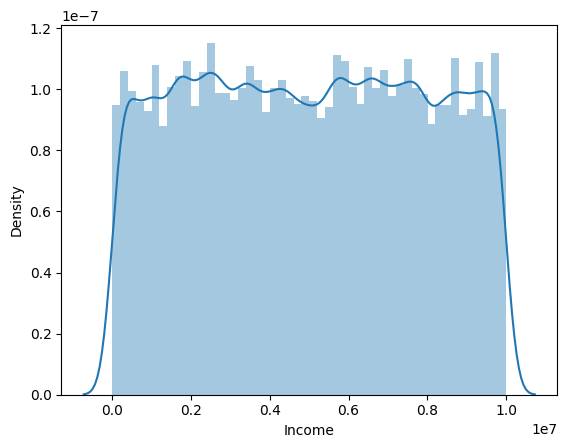

In [16]:
# Analizamos dispersión de columnas 
sns.distplot(df['Income'])
df['Income'].describe()

<ipython-input-17-3a936a718254>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


count    252000.000000
mean         49.954071
std          17.063855
min          21.000000
25%          35.000000
50%          50.000000
75%          65.000000
max          79.000000
Name: Age, dtype: float64

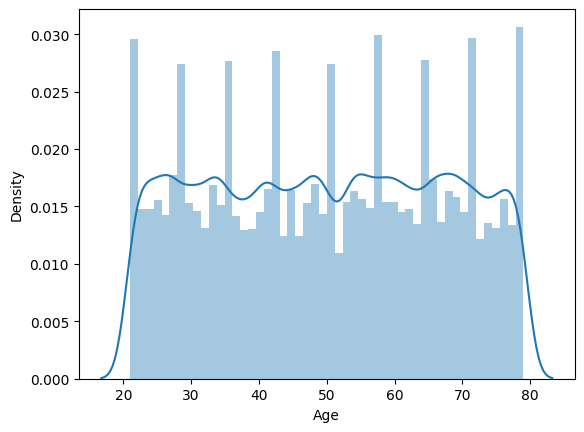

In [17]:
sns.distplot(df['Age'])
df['Age'].describe()

<ipython-input-18-3f492a455230>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Experience'])


count    252000.000000
mean         10.084437
std           6.002590
min           0.000000
25%           5.000000
50%          10.000000
75%          15.000000
max          20.000000
Name: Experience, dtype: float64

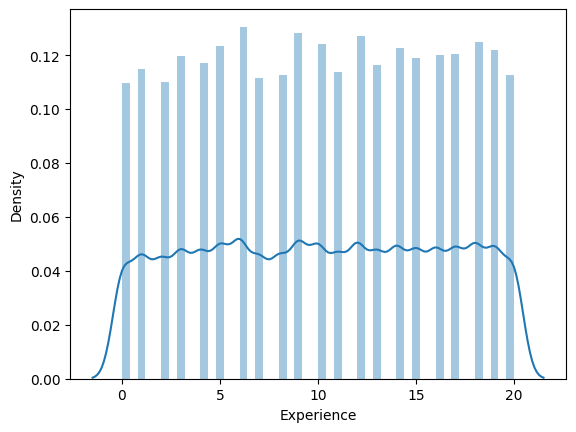

In [18]:
sns.distplot(df['Experience'])
df['Experience'].describe()

Id    Income       Age  Experience  Marital_Status  \
Id                 1.000000 -0.001324 -0.001816   -0.005810       -0.001134   
Income            -0.001324  1.000000 -0.000652    0.006422       -0.002682   
Age               -0.001816 -0.000652  1.000000   -0.001118        0.005323   
Experience        -0.005810  0.006422 -0.001118    1.000000        0.001752   
Marital_Status    -0.001134 -0.002682  0.005323    0.001752        1.000000   
House_Ownership    0.002527 -0.006412  0.017551    0.013346       -0.026208   
Car_Ownership     -0.004313  0.004068  0.009395    0.007519       -0.001206   
CURRENT_JOB_YRS   -0.003250  0.007045  0.002154    0.646098       -0.004251   
CURRENT_HOUSE_YRS  0.001972 -0.002397 -0.020134    0.019309        0.007539   
Risk_Flag          0.032153 -0.003091 -0.021809   -0.034523       -0.021092   
State_GDP         -0.001772  0.004462  0.011599   -0.000051        0.005241   
Literacy_Rate     -0.000594 -0.014583  0.005926    0.009881       -0.015748   
Population        -0.001458 -0.004703  0.013201    0.009326        0.016412   
Unemployment      -0.000105 -0.001234  0.006065   -0.008938       -0.014121   
Poverty_Rate      -0.002074 -0.003584  0.006128    0.016649       -0.008936   
Region             0.000951 -0.006052  0.006690    0.003045        0.018734   
Per_Capita_Income  0.002465 -0.003131 -0.004361   -0.013509       -0.006646   
Income_Category   -0.002065  0.470420  0.002381   -0.010237       -0.010212   
Age_Group         -0.002063  0.008187  0.486405    0.001923       -0.012513   

                   House_Ownership  Car_Ownership  CURRENT_JOB_YRS  \
Id                        0.002527      -0.004313        -0.003250   
Income                   -0.006412       0.004068         0.007045   
Age                       0.017551       0.009395         0.002154   
Experience                0.013346       0.007519         0.646098   
Marital_Status           -0.026208      -0.001206        -0.004251   
House_Ownership           1.000000       0.002167         0.009390   
Car_Ownership             0.002167       1.000000         0.011099   
CURRENT_JOB_YRS           0.009390       0.011099         1.000000   
CURRENT_HOUSE_YRS         0.013786       0.000251         0.005372   
Risk_Flag                -0.026661      -0.024036        -0.016942   
State_GDP                -0.000021       0.012781         0.010696   
Literacy_Rate            -0.000190       0.007252         0.007043   
Population               -0.003422       0.019984         0.012307   
Unemployment             -0.027304       0.000619        -0.005371   
Poverty_Rate             -0.001459       0.001155         0.004604   
Region                    0.001419       0.001629        -0.004002   
Per_Capita_Income         0.016163      -0.009677        -0.005736   
Income_Category           0.011179      -0.008435        -0.015178   
Age_Group                 0.005831       0.010025        -0.005141   

                   CURRENT_HOUSE_YRS  Risk_Flag  State_GDP  Literacy_Rate  \
Id                          0.001972   0.032153  -0.001772      -0.000594   
Income                     -0.002397  -0.003091   0.004462      -0.014583   
Age                        -0.020134  -0.021809   0.011599       0.005926   
Experience                  0.019309  -0.034523  -0.000051       0.009881   
Marital_Status              0.007539  -0.021092   0.005241      -0.015748   
House_Ownership             0.013786  -0.026661  -0.000021      -0.000190   
Car_Ownership               0.000251  -0.024036   0.012781       0.007252   
CURRENT_JOB_YRS             0.005372  -0.016942   0.010696       0.007043   
CURRENT_HOUSE_YRS           1.000000  -0.004375  -0.013191       0.005984   
Risk_Flag                  -0.004375   1.000000  -0.022603      -0.012102   
State_GDP                  -0.013191  -0.022603   1.000000       0.550429   
Literacy_Rate               0.005984  -0.012102   0.550429       1.000000   
Population                  0.006821  -0.0

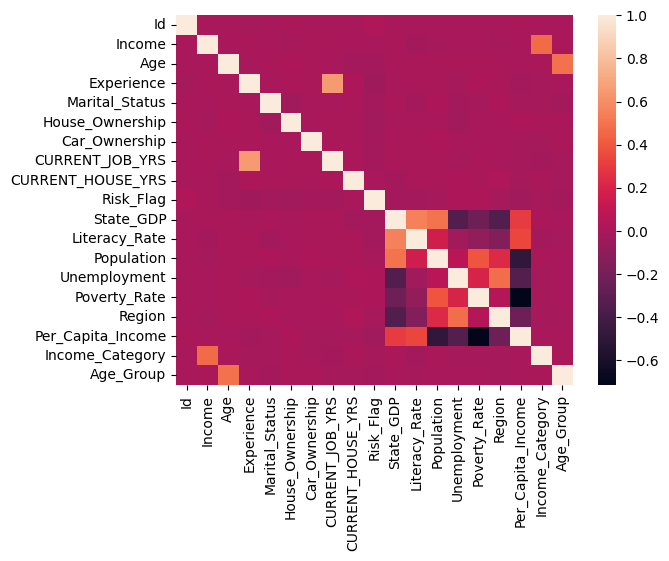

In [19]:
# Observamos mapas de calor
correlaciones= df.corr()
sns.heatmap(correlaciones)
correlaciones

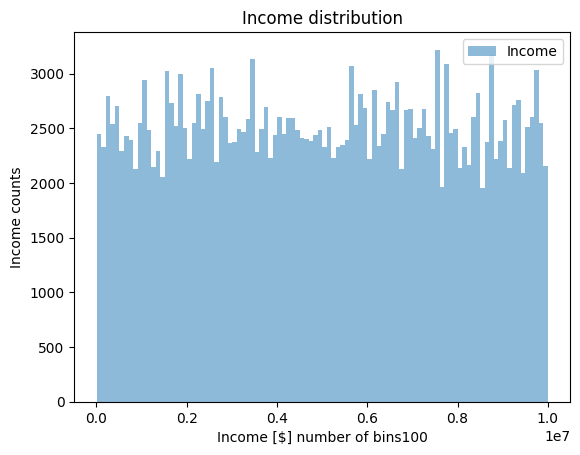

In [21]:
# A) La distribución de ingresos es normal y no uniforme
nbin=100;
plt.hist(df.loc[:,'Income'],bins=nbin , alpha=0.5, label='Income')
plt.legend(loc='upper right')
plt.title("Income distribution")
plt.xlabel('Income [$] number of bins'+str(nbin))
plt.ylabel('Income counts')
plt.show()

Grafica A)

La grafica con indice "A)" fue realizada con matplotlib y muestra un histograma. En este caso el proposito de histograma es mostrar la frecuencia de distribucion de los ingresos de las personas a las que se estan evaluando. En este caso automaticamente se crearon 100 rangos para poder visualizar si hay algún distribucion de salarios entre las personas. En este caso podemos observar que tenemos una distribucion uniforme,m es decir las personas tienen salarios con pequeñas diferencias.

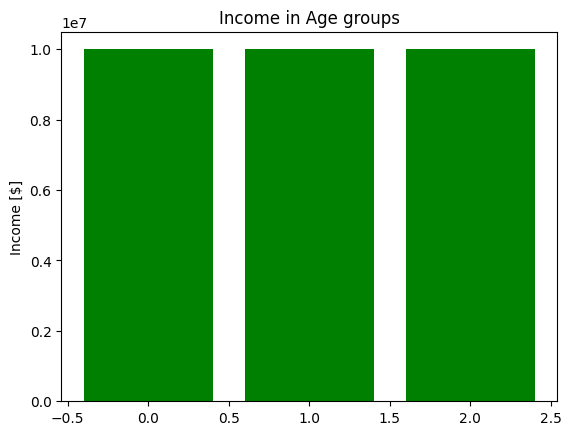

In [23]:
#B) Se presume que los ingresos en los diferentes categorias de edad son diferentes

plt.bar(df.loc[:,'Age_Group'], df.loc[:,'Income'], color="green")
plt.title("Income in Age groups")
plt.ylabel("Income [$]")
plt.show()

Grafica B)

Las grafica con indice B) es realizada con un barplot, y fue graficada con matplotlib. En este caso se queria ver el ingerso de las personas con respecto a su grupo de edad sin embargo podemos observar en esta grafica que entre los diferentes grupos de edades tienen sueldos similares.

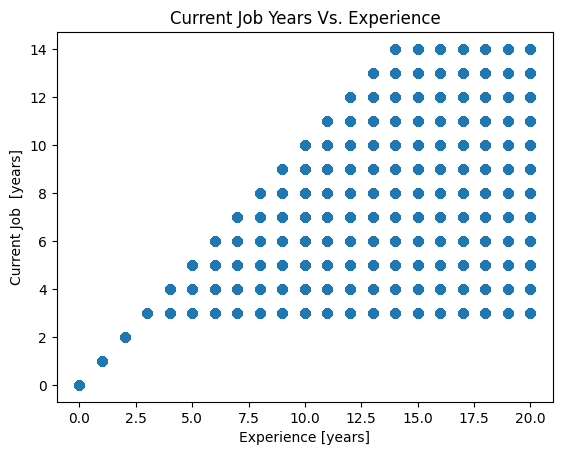

In [24]:
#C) Se presume que las persoans que llevan tiempo en su trabajo actual tienen una mayor experiencia

plt.scatter(df.loc[:,'Experience'], df.loc[:,'CURRENT_JOB_YRS'], alpha=0.5)
plt.title("Current Job Years Vs. Experience")
plt.ylabel("Current Job  [years]")
plt.xlabel("Experience [years]")
plt.show()


Grafica C)

La grafica con indice c), es una grafica de dispersion realizada con matplotlib. En esta grafica se pretendia ver si hay una correlacion entre los años de experiencia de una persona, y la cantidad de años que lleva una persona. En esta grafica podemos observar que apartir de los 5 años de experiencia, las personas se mantienen más tiempo en el trabajo

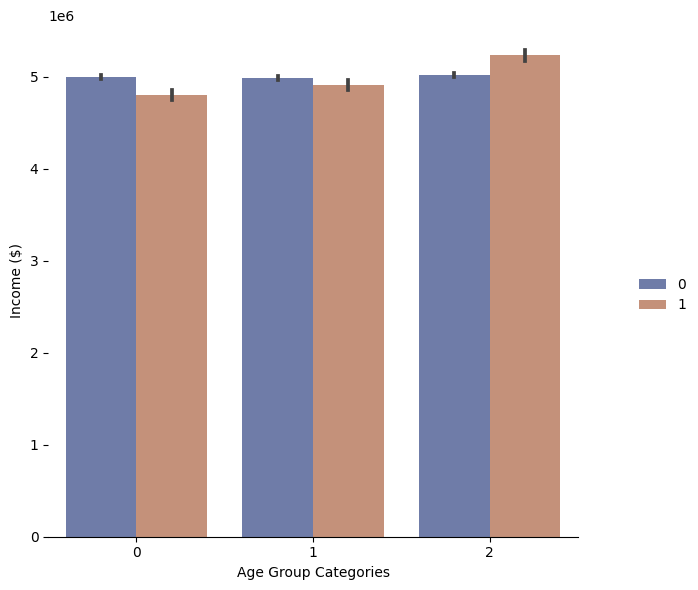

In [25]:
#D) Se considera que los casados tienen más dinero que los solteros

z = sns.catplot(
    data=df, kind="bar",
    x="Age_Group", y="Income", hue="Marital_Status",
     palette="dark", alpha=.6, height=6
);
z.despine(left=True)
z.set_axis_labels("Age Group Categories", "Income ($)")
z.legend.set_title("")


Grafica D)


La grafica con indice e) muestra una grafica de tipo "barplot", agrupada. En este caso relaciona los grupos de personas divididos por su estado marital. En este caso se puede decir que las personas dentro del grupo de edad media, casados gozan de un mejor ingreso que las personas solteras.

In [26]:
# Realizando el feature selection
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [27]:
input= df.drop('Risk_Flag',1)
input.head(5)

<ipython-input-27-840fea13be42>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  input= df.drop('Risk_Flag',1)


Id   Income  Age  Experience  Marital_Status  House_Ownership  \
0   1  1303834   23           3               0                0   
1   2  7574516   40          10               0                0   
2   3  3991815   66           4               1                0   
3   4  6256451   41           2               0                0   
4   5  5768871   47          11               0                0   

   Car_Ownership  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS     State_GDP  \
0              0                3                 13  5.645140e+12   
1              0                9                 13  1.889310e+13   
2              0                4                 10  5.144000e+12   
3              1                2                 12  3.814700e+12   
4              0                3                 14  1.245600e+13   

   Literacy_Rate  Population  Unemployment  Poverty_Rate  Region  \
0          75.37    72627000            47         31.65       0   
1          94.00   112374000            65         17.35       1   
2          66.41    33406000           116          7.05       2   
3          74.43    41974000            78         32.59       3   
4          75.84    72147000            58         11.28       2   

   Per_Capita_Income  Income_Category  Age_Group  
0        77727.89321                0          0  
1       168126.67170                1          0  
2       153984.31120                2          1  
3        90882.52966                2          2  
4       172646.83910                2          2

In [28]:
output = df['Risk_Flag']
output.head(5) 

0    0
1    0
2    0
3    1
4    1
Name: Risk_Flag, dtype: int64

In [29]:
selectedFeatures=stepwise_selection(input,output)
print(selectedFeatures)

<ipython-input-26-7959fcd56cf3>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-26-7959fcd56cf3>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-26-7959fcd56cf3>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-26-7959fcd56cf3>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-26-79

['Experience', 'Id', 'House_Ownership', 'Per_Capita_Income', 'Car_Ownership', 'Marital_Status', 'Age', 'Region', 'Unemployment', 'CURRENT_JOB_YRS', 'State_GDP', 'Income_Category']


In [30]:
len(selectedFeatures)

12

In [31]:
#Emepzamos una clasificación por arbol binario
# definimos matriz de diseño X y vector respuesta y
X = df[selectedFeatures]
y = output
# Separamos en entrenamiento/test en razon 80/20 %
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
# Creamos un modelo Random Forest con parametros por defect
modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test)

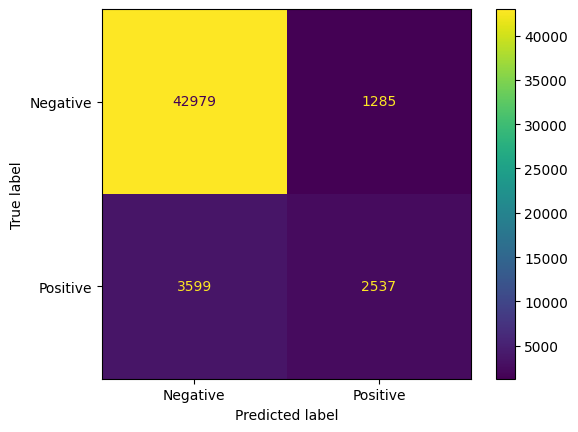

In [32]:

ConfusionMatrixDisplay.from_estimator(modelo, X_test, y_test, display_labels=['Negative', 'Positive'])
plt.show()

In [33]:
#Clasificación de metricas
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     44264
           1       0.66      0.41      0.51      6136

    accuracy                           0.90     50400
   macro avg       0.79      0.69      0.73     50400
weighted avg       0.89      0.90      0.89     50400



# Conclusiones
Se ha cumplido con los elementos solicitados. Se ha reducido el dataset de caracteristicas de 18 a 12 datos unicamente.Se ha implementado un modelo de calsificacion de arbol y se entreno con un 80% de informacion y se utilizo un 20% para la prediccion. Se ha obtenido un 90% de precision, lo cual podemos considerar un buen procentaje de clasificacion total. 

In [34]:
!git config global user.email “arturo_gonzalezm@hotmail.com”
!git config global user.name “Arturo Drive”

error: key does not contain a section: global
usage: git config [<options>]

Config file location
    --global              use global config file
    --system              use system config file
    --local               use repository config file
    --worktree            use per-worktree config file
    -f, --file <file>     use given config file
    --blob <blob-id>      read config from given blob object

Action
    --get                 get value: name [value-regex]
    --get-all             get all values: key [value-regex]
    --get-regexp          get values for regexp: name-regex [value-regex]
    --get-urlmatch        get value specific for the URL: section[.var] URL
    --replace-all         replace all matching variables: name value [value_regex]
    --add                 add a new variable: name value
    --unset               remove a variable: name [value-regex]
    --unset-all           remove all matches: name [value-regex]
    --rename-section      rename section: ol

In [18]:
%cd /content/gdrive/MyDrive/DataScience_Curso01/Entregas/6 Entrega Final Parte 1
!ls

/content/gdrive/MyDrive/DataScience_Curso01/Entregas/6 Entrega Final Parte 1
Loan_prediction_final.csv	      PrimeraEntrega.jpg
PrimeraEntrega_ArturoGonzalezMendoza


In [20]:
!git init


Initialized empty Git repository in /content/gdrive/MyDrive/DataScience_Curso01/Entregas/6 Entrega Final Parte 1/.git/


In [22]:
!git remote add origin https://github.com/canibulin/DSEntregaFinalParte1ArturoGonzalezM.git


In [23]:
!git add .

In [26]:
!git status

On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
	new file:   Loan_prediction_final.csv
	new file:   PrimeraEntrega.jpg
	new file:   PrimeraEntrega_ArturoGonzalezMendoza

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   PrimeraEntrega_ArturoGonzalezMendoza



In [31]:
!git commit -a --allow-empty-message -m ''
!git branch -M main


[main 206f6ec] 
 1 file changed, 1 insertion(+), 1 deletion(-)


In [35]:
!git push -u origin main

fatal: could not read Username for 'https://github.com': No such device or address
